In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import seaborn as sns
import sklearn as sk
import re

In [203]:
# 한글 출력
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rc('axes', unicode_minus=False)
plt.rcParams['figure.figsize'] = (15, 7)

In [ ]:
팀 상황 알아보기(삼성 라이온즈)

In [192]:
df = pd.read_excel(r'D:\IT\mywork\Project\KBO-Analysis\dataset\kbo_team2.xlsx', encoding='utf-8', index=False)
samsung = df[df.Team == '삼성'].reset_index(drop=True)
notsam = df[df.Team != '삼성'].reset_index(drop=True)
samsung.head()

,Team,Season,WAR,G,PA,AB,R,H,2B,3B,...,OPS,wOBA,WRC+,순위,경기,승,패,무,승률,게임차
0,삼성,1982,18.61,887,3043,2647,429,705,126,18,...,0.739,0.338,104.3,2,80,54,26,0,0.675,2.0
1,삼성,1983,23.31,1249,3847,3383,448,889,143,14,...,0.726,0.332,110.3,4,100,46,50,4,0.479,7.5
2,삼성,1984,24.07,1262,3756,3298,435,889,147,18,...,0.739,0.339,113.9,2,100,55,45,0,0.550,-4.0
3,삼성,1985,29.97,1513,4250,3644,552,1005,181,22,...,0.772,0.351,117.9,1,110,77,32,1,0.706,0.0
4,삼성,1986,30.54,1527,4119,3617,475,997,177,22,...,0.744,0.346,123.2,2,108,70,37,1,0.654,-1.5


In [201]:
df.corr()['순위'].sort_values().head(10)

승률     -0.829632
승      -0.632079
WRC+   -0.621007
WAR    -0.612050
wOBA   -0.414898
OBP    -0.392446
OPS    -0.364792
AVG    -0.343150
SLG    -0.331033
SB     -0.238424
Name: 순위, dtype: float64

In [ ]:
팀의 순위와 가장 관계가 높은 타격 지표는 WRC+로 -0.6의 높은 상관관계를 가짐. 이는 WRC+가 높을 수록 팀 순위가 높다는 것을 의미함.
(순위는 낮은 숫자인 1에 가까울 수록 좋지만, WRC+는 높을 수록 좋으므로 상관관계는 +가 아닌 -로 나타남.)

따라서 본 분석에서는 WRC+를 중심으로 타자들을 분석함.

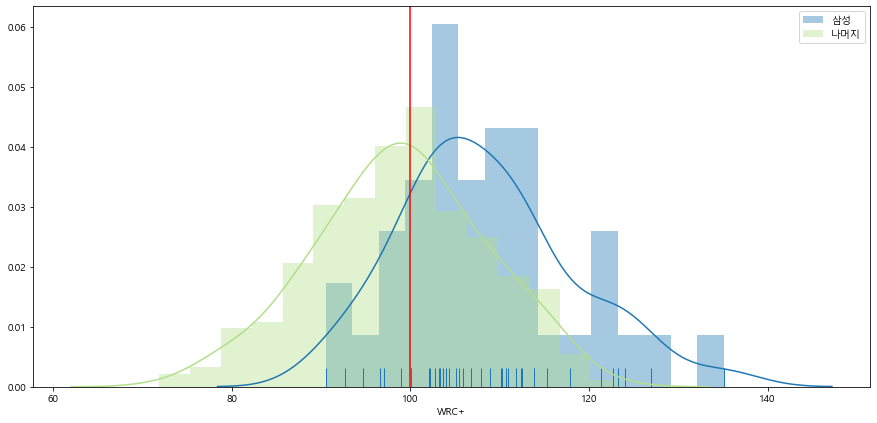

In [205]:
color = sns.color_palette('Paired', 9)
sns.distplot(samsung['WRC+'], bins=15, rug=True, color=color[1], label='삼성')
sns.distplot(notsam['WRC+'], bins=15, color=color[2], label='나머지')
plt.axvline(x=100, color='r')
plt.legend()
plt.show()

In [5]:
under = samsung[samsung['WRC+']<100]
under

,Team,Season,WAR,G,PA,AB,R,H,2B,3B,...,OPS,wOBA,WRC+,순위,경기,승,패,무,승률,게임차
25,삼성,2007,20.97,1657,4895,4186,497,1062,191,9,...,0.706,0.326,97.0,4,126,62,60,4,0.508,11.5
29,삼성,2011,25.18,1689,5145,4437,625,1150,193,20,...,0.719,0.334,98.9,1,133,79,50,4,0.612,0.0
35,삼성,2017,16.82,1786,5707,5095,757,1419,255,36,...,0.768,0.337,92.7,9,144,55,84,5,0.396,30.0
36,삼성,2018,19.89,1717,5766,5109,776,1471,241,29,...,0.787,0.344,96.6,6,144,68,72,4,0.486,23.0
37,삼성,2019,17.45,1652,5533,4866,622,1245,230,26,...,0.718,0.328,94.7,8,144,60,83,1,0.420,28.0
38,삼성,2020,15.66,1865,5574,4923,699,1317,211,12,...,0.732,0.333,90.5,8,144,64,75,5,0.460,19.5


In [ ]:
삼성 라이온즈 역사상 WRC+가 평균인 100 이하로 떨어진 적은 손에 꼽을 정도임. 즉, 삼성은 리그 내에서도 항상 높은 생산성을 가진 타선을
자랑했던 팀이고 심지어 2000년대 중반의 침체기 때도 2007년을 제외하고는 평균 이상의 생산성을 유지했음.

In [6]:
years = [2007, 2011, 2016, 2017, 2018, 2019, 2020]
compare = pd.DataFrame()

for year in years:
    s = samsung[samsung.Season == year]
    compare = pd.concat([compare, s[['Season', 'WRC+', 'WAR', 'AVG', 'OBP', 'SLG', 'OPS', 'wOBA']]])

compare.reset_index(inplace=True, drop=True)
compare

,Season,WRC+,WAR,AVG,OBP,SLG,OPS,wOBA
0,2007,97.0,20.97,0.254,0.341,0.365,0.706,0.326
1,2011,98.9,25.18,0.259,0.343,0.376,0.719,0.334
2,2016,100.1,22.21,0.293,0.367,0.439,0.806,0.360
3,2017,92.7,16.82,0.279,0.340,0.428,0.768,0.337
4,2018,96.6,19.89,0.288,0.355,0.432,0.787,0.344
5,2019,94.7,17.45,0.256,0.329,0.389,0.718,0.328
6,2020,90.5,15.66,0.268,0.338,0.394,0.732,0.333


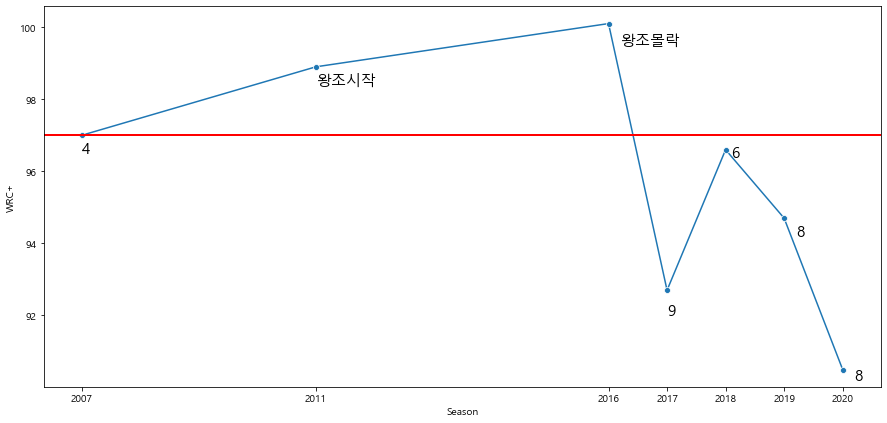

In [7]:
sns.lineplot(compare.Season, compare['WRC+'], marker='o')
plt.axhline(y=97, color='r', linewidth=2)

plt.text(2007, 96.5, '4', fontsize=15)
plt.text(2011, 98.4, '왕조시작', fontsize=15)
plt.text(2016.2, 99.5, '왕조몰락', fontsize=15)
plt.text(2017, 92, '9', fontsize=15)
plt.text(2018.1, 96.4, '6', fontsize=15)
plt.text(2019.2, 94.2, '8', fontsize=15)
plt.text(2020.2, 90.2, '8', fontsize=15)

plt.xticks(compare.Season)
plt.show()

In [ ]:
하지만, FA와 은퇴로 팀의 클린업을 담당하던 주요 타자들이 이탈한 2016년을 기점으로, 삼성 타자들의 WRC+는 2007년의 소위 '삼점 라이온즈'
시절 이하로 급격하게 추락함. 암흑기 동안 꾸준하게 기록중인 100 이하의 팀WRC+는 타자가 타석에 들어서서 무엇을 해도 평균보다 더 점수를
못낸다는 것을 의미함.

다만, 팀 타선의 생산성이 2007년 수준으로 살짝 반등했었던 2018년에 팀이 마지막까지 가을 야구를 경쟁했었다는 것을 생각해보면, 
이 팀은 타선만 뒷받침 된다면 충분히 재도약이 가능할 것으로 보이지만, 2018년의 반등이 이어지지 못하고 2년만에 팀 역사상
최악의 WRC+인 90.5를 기록했다는 것은 삼성 타자들의 기량이 2년동안 전혀 늘지 않았다는 것이고, 타선 리빌딩이 실패 했다는 것을 의미함.

In [30]:
df = pd.read_excel(r'D:\IT\mywork\Project\KBO-Analysis\dataset\kbo_batter2.xlsx', encoding='utf-8', index=False)

for idx in df.index:
    if len(df.iloc[idx].Team) == 2:
        x = df.iloc[idx].copy()
        x.Team = x.Team[-1]
        df.iloc[idx] = x

df.head()

,Name,Season,Birth,Team,Position,WAR,G,PA,AB,R,...,DP,SH,SF,AVG,OBP,SLG,OPS,wOBA,WRC+,Age
0,백인천,1982,1943-11-27,M,DH,5.88,72,298,250,55,...,5,0,3,0.412,0.497,0.740,1.237,0.528,227.0,39
1,윤동균,1982,1949-07-02,O,LF,4.13,77,334,284,54,...,3,0,4,0.342,0.428,0.532,0.960,0.430,164.6,33
2,이만수,1982,1958-09-19,삼,C,4.12,78,322,270,46,...,13,0,1,0.289,0.399,0.500,0.899,0.405,147.6,24
3,김봉연,1982,1952-01-13,해,DH,3.68,74,304,269,55,...,8,0,1,0.331,0.405,0.636,1.040,0.453,180.5,30
4,김우열,1982,1949-09-09,O,CF,3.46,62,255,210,43,...,0,0,1,0.310,0.428,0.533,0.961,0.426,161.9,33


In [31]:
df2020 = df[df.Season == 2020].reset_index(drop=True)
df2020.PA.describe()

count    273.000000
mean     207.245421
std      199.599439
min        1.000000
25%       37.000000
50%      128.000000
75%      369.000000
max      668.000000
Name: PA, dtype: float64

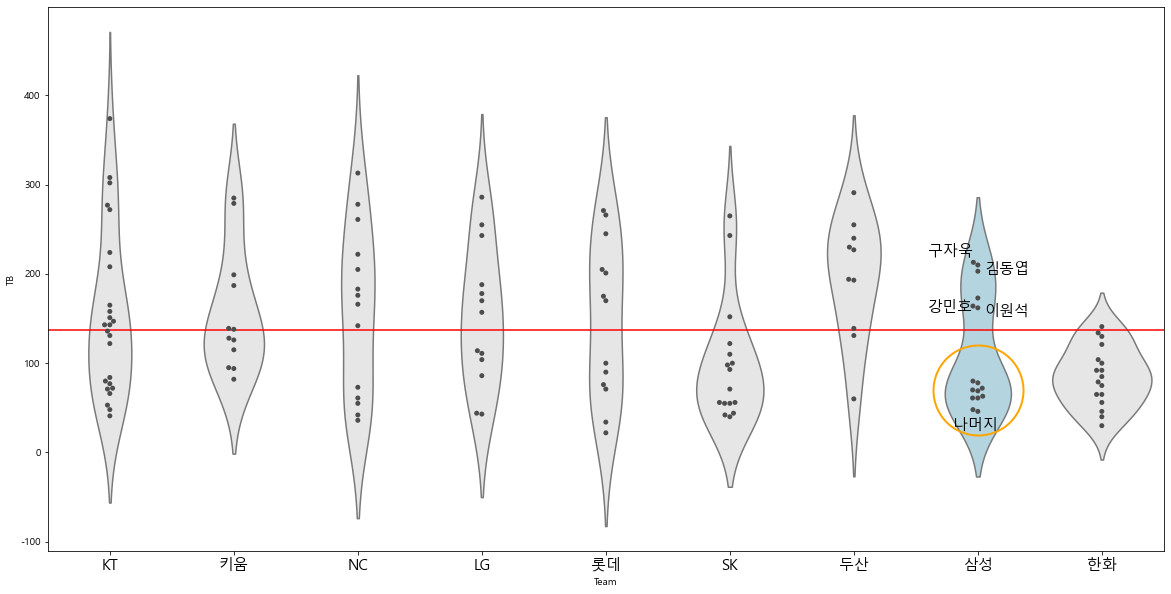

In [236]:
compare2 = df2020[df2020.PA > 128].reset_index(drop=True).copy()

palette = ['0.9', '0.9', '0.9', '0.9', '0.9','0.9', '0.9', 'lightblue', '0.9']
plt.figure(figsize=[20,10])

sns.violinplot(x=compare2.Team, y=compare2.TB, orient='v', inner=None, palette=palette)
plt.axhline(y=compare2.TB.mean(), color='r')
sns.swarmplot(x='Team', y='TB', data=compare2, color='0.3')
plt.plot(7, 70, 'o', ms= 45* 2, mec='Orange', mfc='none', mew=2)

plt.xticks(np.arange(0, 9), labels = ['KT', '키움', 'NC', 'LG', '롯데', 'SK', '두산', '삼성', '한화'], fontsize=15)
plt.text(6.8, 25, '나머지', fontsize=15)
plt.text(6.6, 221, '구자욱', fontsize=15)
plt.text(7.05, 200, '김동엽', fontsize=15)
plt.text(6.6, 157, '강민호', fontsize=15)
plt.text(7.05, 153, '이원석', fontsize=15)

plt.show()

In [ ]:
쉬운 비교를 위해, 올해 우승을 차지한 NC와 준우승한 두산의 분포를 비교해 보면, 두산 타자들은 모두 평균 이상에 위치해 있어 선수들의
기량 하나하나가 뛰어난 타선이라고 볼 수 있음. 즉, 타선이 한번 기세를 타면 무섭게 몰아칠 수 있지만, 주전에 대한 의존도가 높아 주전 
선수들이 슬럼프가 오면 팀타선 자체가 꽉막혀 버릴 가능성이 있음. 그에 비해 NC는 정말 골고루 분포된 안정적인 팀타선으로, 상위권의 주전들이
슬럼프를 겪더라도 중하위권의 선수들이 탄탄하기 때문에 항상 평균적인 활약이 보장되는 타선이라고 할 수 있음.

그에 비해 올해 하위권을 차지한 삼성, SK, 한화의 팀TB 평균은 리그 평균과 한참 떨어진 곳에 머무르고 있음. 특히, 삼성 타자들의 TB 분포는
분포 상단에 위치한 일부 선수 몇명을 제외하고는 극단적으로 하향평준화 되어 있음. 쉽게말해, 잘하는 선수에 비해 못하는 선수가 훨씬 많아서
선수들이 장타를 치던 도루를 하던, 후속타석에서 점수로 이어지지 않으니 평균 이하의 생산성을 가진 타선이 될 수 밖에 없음.

특히 위 violinplot에서 상위권 그룹 제일 아래에는 강민호와 이원석이 속해 있는데, 이 두 선수의 나이를 고려했을 때 이 둘 역시 몇년 이내로
아래쪽의 하향평준화 그룹으로 떨어질 가능성이 높음. 만약 그런 상황에서 현재 하위권 그룹에 속한 유망주들이 전혀 성장하지 못한다면
더욱 심해질 것이고 최악의 상황으로 구자욱과 김동엽이 이탈하거나 기량하락이 찾아오면 옆의 한화 타자 분포와 같이 평균 이하의 선수들만
모인 타선이 될 것으로 보임.

In [33]:
compare3 = df2020[df2020.PA > 128].reset_index(drop=True).copy()
falist = ['오재일', '최주환', '허경민', '김재호', '정수빈', '최형우']

for idx in compare3.index:
    if compare3.iloc[idx].Team != '삼':
        if compare3.iloc[idx].Name in falist:
            x = compare3.iloc[idx].copy()
            x.Team = 'FA'
            compare3.iloc[idx] = x
        else:
            x = compare3.iloc[idx].copy()
            x.Team = 'Other'
            compare3.iloc[idx] = x

compare3.head()

,Name,Season,Birth,Team,Position,WAR,G,PA,AB,R,...,DP,SH,SF,AVG,OBP,SLG,OPS,wOBA,WRC+,Age
0,로하스,2020,1990-05-24,Other,RF,7.80,142,628,550,116,...,11,0,8,0.349,0.417,0.680,1.097,0.467,180.9,30
1,김하성,2020,1995-10-17,Other,SS,6.87,138,622,533,111,...,12,3,3,0.306,0.397,0.523,0.921,0.407,147.4,25
2,양의지,2020,1987-06-05,Other,C,5.95,130,528,461,86,...,11,1,6,0.328,0.400,0.603,1.003,0.432,153.3,33
3,터커,2020,1990-07-06,Other,RF,5.70,142,631,542,100,...,12,0,4,0.306,0.398,0.557,0.955,0.420,148.9,30
4,최형우,2020,1983-12-16,FA,DH,5.70,140,600,522,93,...,9,0,3,0.354,0.433,0.590,1.023,0.450,168.4,37


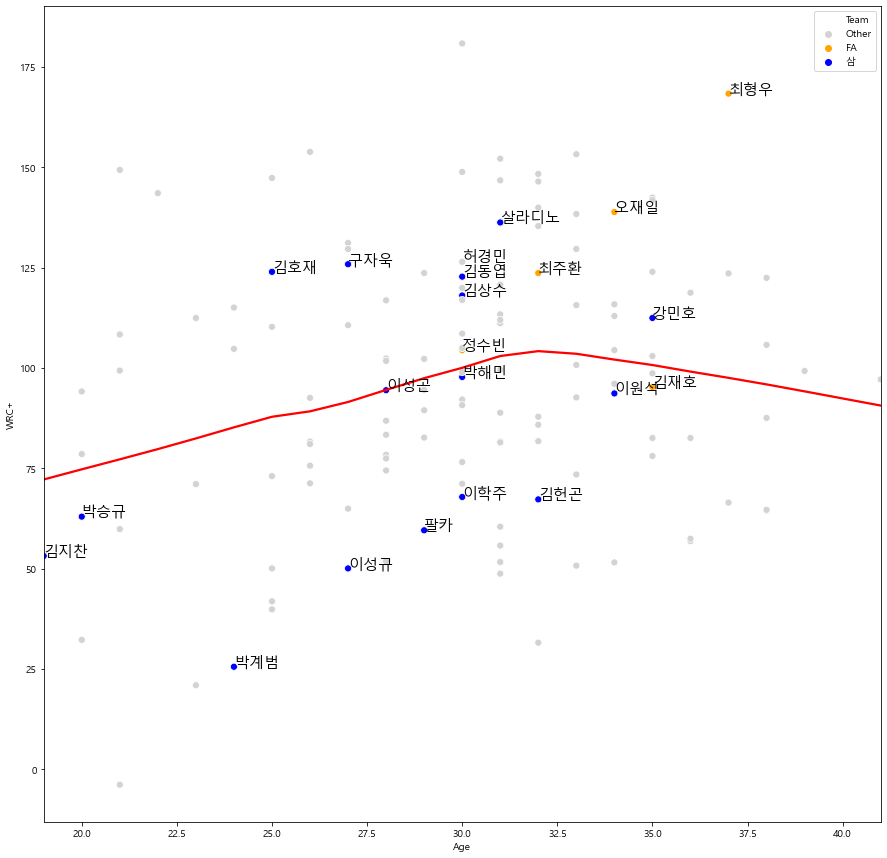

In [35]:
plt.figure(figsize=[15, 15])

X = compare3[(compare3.Team == '삼') | (compare3.Team == 'FA')].Age
Y = compare3[(compare3.Team == '삼') | (compare3.Team == 'FA')]['WRC+']
name = compare3[(compare3.Team == '삼') | (compare3.Team == 'FA')].Name


sns.regplot(x='Age', y='WRC+', lowess=True, data=compare3, line_kws={'color': 'red'}, scatter=False)
sns.scatterplot('Age', 'WRC+', data=compare3, hue=compare3.Team, s=50, palette=['lightgrey','orange','blue'])

for x, y, n in zip(X, Y, name):
    if n == '허경민': # 허경민, 김동엽이 겹침
        plt.text(x, y+4, n, fontsize=15)
    else:
        plt.text(x, y, n, fontsize=15)
        
plt.show()

In [ ]:
올해의 삼성타선을 살펴보면 구자욱, 김동엽, 강민호, 김상수를 제외하고는 모두 생산성이 최하위권에 위치함. 특히 올해 대놓고 기회를 
부여받았던 이성규와 대체용병 팔카는 평균에도 한참 못미치는 압도적인 꼴지를 기록하면서 주전으로 뛰면서도 오히려 -의 효과를 만든 주범이 
되었음. 그래도 35세의 강민호가 반등에 성공하며 선방을 해냈고, 구자욱과 김동엽이 해당 나이대에서 최상위권의 WRC+를 기록한 것은 긍정적으로
볼 수 있지만, 앞서 말했듯이 현재 삼성타선은 하향평준화 되어 있기 때문에, 이를 보완하기 위해서는 게임처럼 갑자기 유망주들이
폭발하지 않는 이상, 외부 FA 영입이 필요함.

처참한 성적의 삼성 타자들에 비해 올해 FA 대상자가 된 선수들을 살펴보면, 평균 근처의 김재호와 정수빈을 제외한다면 최형우, 허경민, 오재일,
최주환 모두 삼성 타선에 큰 도움이 될 수 있는 선수들임. 이 중, 김상수와 포지션이 겹치는 최주환을 제외한다면, FA로 영입할 선수는 오재일,
최형우, 허경민으로 좁혀짐. 하지만 이 세 선수 외에도 내부 FA로 3루수 이원석이 풀리기 때문에 이원석과 재계약을 할지도 고민해봐야 함.

In [ ]:
# 에이징 커브 알아보기

In [36]:
name = set(df.Name)
aging_df = pd.DataFrame()

for n in name:
    active = df[df.Name == n].Season
    if len(active) > 8:
        aging_df = pd.concat([aging_df, df[df.Name == n]], ignore_index=True)
        
aging_df = aging_df[aging_df.PA > 100]
aging_df.head()

,Name,Season,Birth,Team,Position,WAR,G,PA,AB,R,...,DP,SH,SF,AVG,OBP,SLG,OPS,wOBA,WRC+,Age
0,이해창,1983,1953-04-23,M,CF,4.53,100,444,388,65,...,5,2,6,0.294,0.367,0.430,0.797,0.365,135.9,30
1,이해창,1984,1953-04-23,M,CF,3.71,100,426,374,62,...,2,0,4,0.273,0.352,0.404,0.756,0.353,125.6,31
2,이해창,1985,1953-04-23,삼,CF,3.08,109,413,352,63,...,5,4,3,0.270,0.364,0.381,0.745,0.350,117.0,32
3,이해창,1986,1953-04-23,삼,LF,2.22,95,260,238,44,...,1,2,2,0.315,0.361,0.429,0.789,0.369,140.1,33
4,이해창,1987,1953-04-23,청,SS,2.17,105,372,327,55,...,3,4,3,0.232,0.310,0.321,0.631,0.301,81.5,34


In [37]:
aging_df.groupby(aging_df.Age).nunique().Name

Age
18      1
19     28
20     45
21     45
22     73
23    142
24    179
25    189
26    213
27    228
28    230
29    241
30    237
31    229
32    201
33    179
34    148
35    113
36     80
37     53
38     37
39     18
40     10
41      8
Name: Name, dtype: int64

In [38]:
aging_df.drop(aging_df[(aging_df.Age == 18) | (aging_df.Age > 38)].index, axis=0, inplace=True)

group_df = aging_df.groupby(aging_df.Age).mean().round(3).drop('Season', axis=1)
group_df.reset_index(inplace=True)
group_df.head()

,Age,WAR,G,PA,AB,R,H,2B,3B,HR,...,SO,DP,SH,SF,AVG,OBP,SLG,OPS,wOBA,WRC+
0,19,1.191,88.036,269.500,236.964,33.250,61.679,11.429,1.607,5.464,...,48.071,4.893,4.071,1.893,0.256,0.328,0.380,0.708,0.323,92.118
1,20,1.648,94.956,311.822,273.244,38.044,74.000,13.089,1.978,5.556,...,52.444,5.133,5.511,2.156,0.265,0.334,0.386,0.719,0.327,97.984
2,21,1.791,101.222,340.178,297.067,41.800,80.600,13.756,2.022,6.578,...,51.089,5.778,6.844,2.000,0.261,0.329,0.380,0.709,0.321,93.020
3,22,2.010,97.904,341.877,297.082,43.164,79.712,13.986,1.740,8.192,...,49.877,6.370,5.589,3.384,0.259,0.330,0.389,0.720,0.326,97.815
4,23,2.038,100.594,338.259,294.252,41.832,79.021,14.385,2.070,7.322,...,49.350,5.804,6.350,2.524,0.259,0.331,0.384,0.716,0.325,97.419


In [215]:
# to plot multiple graphs

def multi_graph(df, records, figsize = [15, 15]):
    plt.rcParams['figure.figsize'] = figsize

    for idx, record in enumerate(records):
        plt.subplot(len(records), len(records)//2, idx+1)
        sns.regplot(x='Age', y=record, data=df, order=2)
        plt.title(record, fontsize=15)
        plt.axvline(x=33, color='r', linewidth=1)
        plt.xticks(df.Age)
    
    plt.tight_layout()
    plt.show()

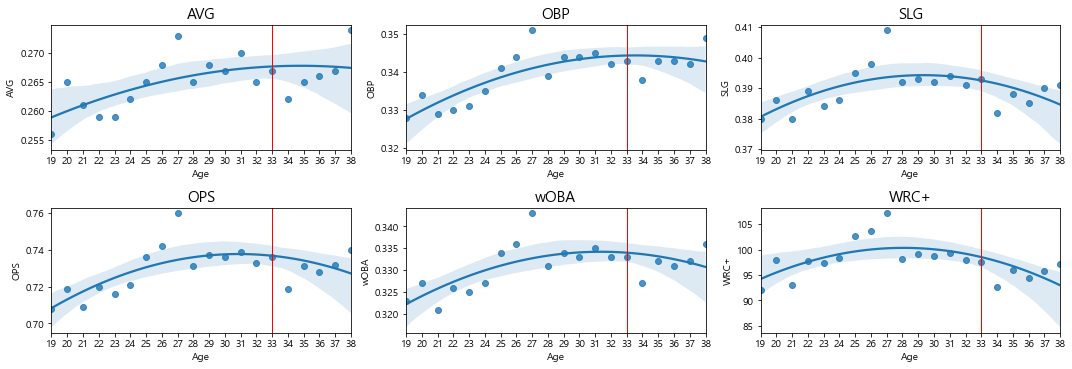

In [216]:
multi_graph(group_df, ['AVG', 'OBP', 'SLG', 'OPS', 'wOBA', 'WRC+'])

In [ ]:
KBO의 타자들은 25~30세에 전성기를 보낸 후, 33세를 기점으로 주요 타격지표가 꺾이기 시작함. 특히, 33세 이후에도 어느정도 유지가 되는 다른 
지표들에 비해 장타율, OPS, wOBA, WRC+의 급격한 감소는 이 지표들이 타자들의 에이징 커브를 판단하기 가장 적합한 지표라는 것을 의미함.

In [61]:
oh = aging_df[aging_df.Name ==  '오재일']
lee = aging_df[aging_df.Name ==  '이원석']
heo = aging_df[aging_df.Name ==  '허경민']
choi = aging_df[aging_df.Name ==  '최형우']

fadf = pd.concat([oh, lee, heo, choi]).reset_index(drop=True)
fadf.head()

,Name,Season,Birth,Team,Position,WAR,G,PA,AB,R,...,DP,SH,SF,AVG,OBP,SLG,OPS,wOBA,WRC+,Age
0,오재일,2011,1986-10-29,넥,DH,-0.01,46,118,100,13,...,2,1,1,0.230,0.333,0.310,0.643,0.307,80.7,25
1,오재일,2012,1986-10-29,넥,1B,-0.47,87,228,212,16,...,3,2,4,0.203,0.235,0.354,0.588,0.268,60.9,26
2,오재일,2013,1986-10-29,두,1B,1.01,55,144,117,16,...,0,1,3,0.299,0.406,0.479,0.884,0.400,140.0,27
3,오재일,2014,1986-10-29,두,1B,0.18,75,155,132,10,...,1,0,2,0.242,0.342,0.364,0.706,0.328,85.7,28
4,오재일,2015,1986-10-29,두,1B,1.84,66,213,180,33,...,5,1,2,0.289,0.387,0.594,0.981,0.414,158.4,29


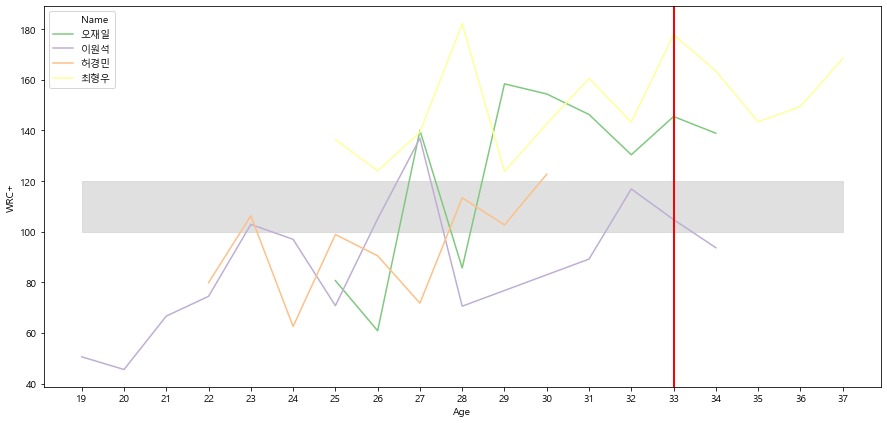

In [42]:
minx = min(fadf.Age)
maxx = max(fadf.Age)

plt.figure(figsize=(15, 7))
sns.lineplot(fadf.Age, fadf['WRC+'], hue=fadf.Name, palette='Accent')
plt.fill([minx, minx, maxx, maxx], [100, 120, 120, 100], color='lightgrey', alpha=0.7)
plt.axvline(x=33, color='r', linewidth=2)
plt.xticks(fadf.Age.unique())

plt.show()

In [ ]:
상세 분석에 앞서 주요 대상들의 WRC+의 변화를 비교해보면, 이제 시기상 전성기를 보내는 중인 허경민을 제외하고, 베테랑 FA인 오재일, 최형우,
이원석 모두 에이징 커브 시작점인 33세를 기준으로 하락세로 접어들었다는 것을 확인할 수 있음. 그 중, 최형우는 에이징 커브를 이겨내고 
반등에 성공했으며, 오재일은 뚜렷한 반등은 없으나 여전히 140 이상의 수준급의 WRC+를 유지 중 임. 하지만, 이원석은 커리어하이 시즌인
2018년 이후 꾸준히 하락세이고, 올해 결국 평균치를 이탈했다는 점에서 WRC+ 변화 상으로는 가장 위험한 FA 대상자로 보임.

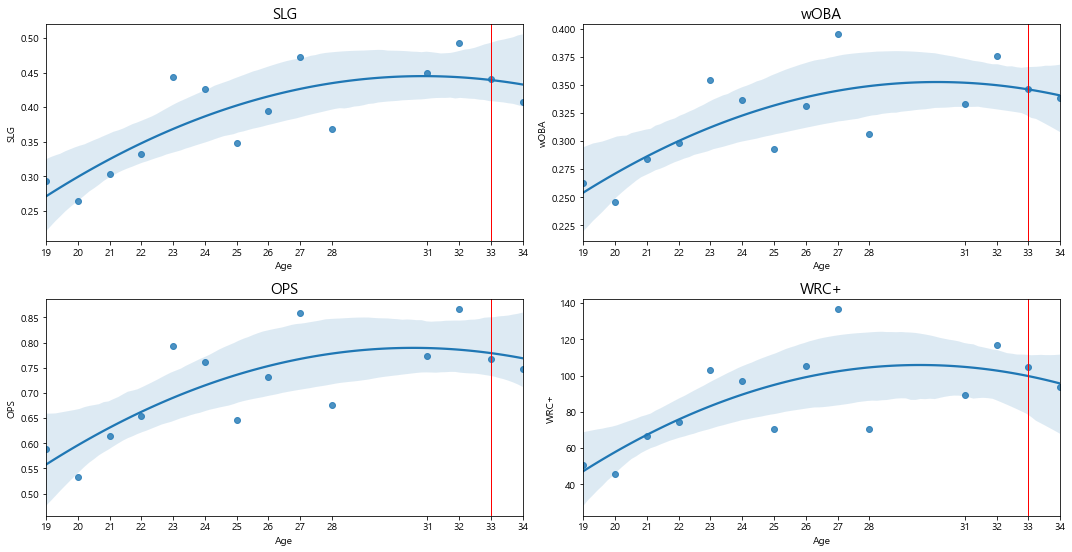

In [220]:
# 이원석
multi_graph(lee, ['SLG', 'wOBA', 'OPS', 'WRC+'])

In [ ]:
앞서 언급한 에이징커브를 확인할 주요 지표들인 장타율, wOBA, OPS, WRC+를 확인해 보면, 이원석의 WRC+는 평균 이하이기는 하나 다행히
에이징 커브 상 정상 궤도 내에 위치해 있음. 그러나 올해 장타율이 신뢰구간 하단에 겨우 걸칠 정도로 심각하게 저하되었다라는 점은
주목해야할 부분임. 다행히 OPS는 장타율의 하락에도 어느정도 선방했지만, 만약 내년에도 뚜렷한 반등을 만들지 못하고 현재 추세가 계속되면,
앞서 말했듯 이원석은 이후 팀 타선에서 아무런 역할을 해주지 못 할 것으로 보임.

그렇기 때문에 삼성이 만약 이원석과 재계약을 시도할 경우, 고액 투자 보다는 성적 반등을 이끌어 낼 수 있는 옵션을 적극적으로 활용해서
싼 가격으로 잡는게 필요해 보임.

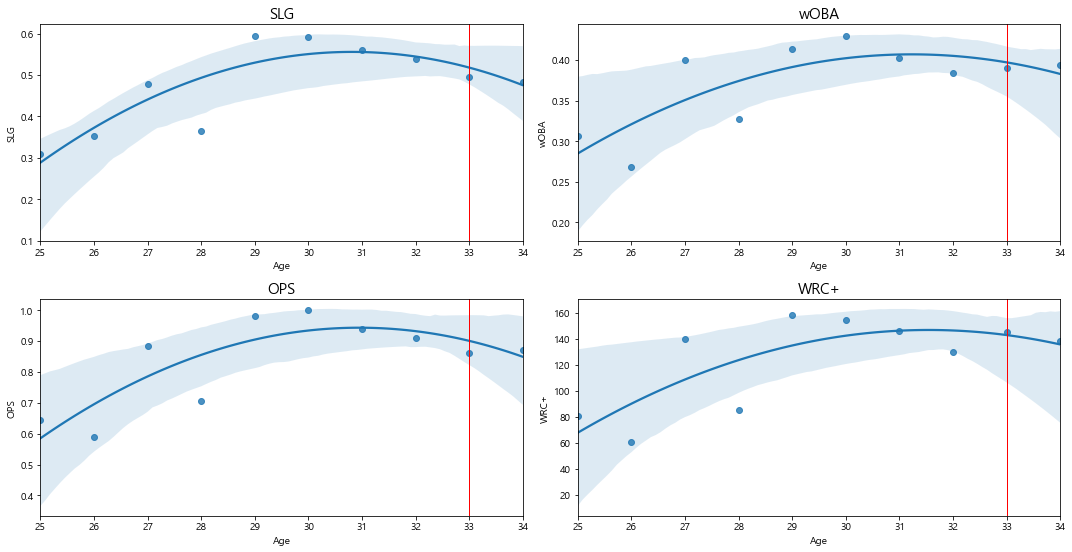

In [224]:
#오재일
multi_graph(oh, ['SLG', 'wOBA', 'OPS', 'WRC+'])

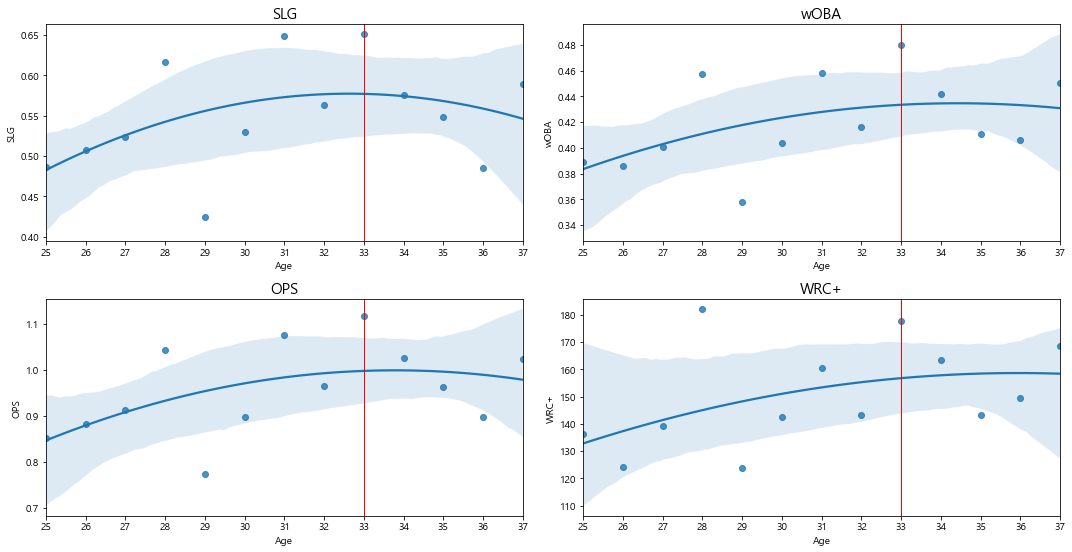

In [222]:
#최형우
multi_graph(choi, ['SLG', 'wOBA', 'OPS', 'WRC+'])